In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
import time

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [5]:
N = 1000
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

In [88]:
timea = time.time()
W, I, C, A, R, P, A_vals, GAMBLE_SUCCESS, communities = simulation(NUM_AGENTS=N,
                                                                   STEPS=50,
                                                                   PROJECT_COST=0.01,
                                                                   graph=g,
                                                                   seed=123)
print(time.time()-timea)

228 communities.
Performing time stepping...


  6%|▌         | 3/50 [00:00<00:02, 20.02it/s]

Updating portfolios... (step = 10)


 22%|██▏       | 11/50 [00:07<00:29,  1.31it/s]

Updating portfolios... (step = 20)


 42%|████▏     | 21/50 [00:14<00:21,  1.36it/s]

Updating portfolios... (step = 30)


 62%|██████▏   | 31/50 [00:22<00:14,  1.34it/s]

Updating portfolios... (step = 40)


100%|██████████| 50/50 [00:29<00:00,  1.71it/s]

39.72070932388306


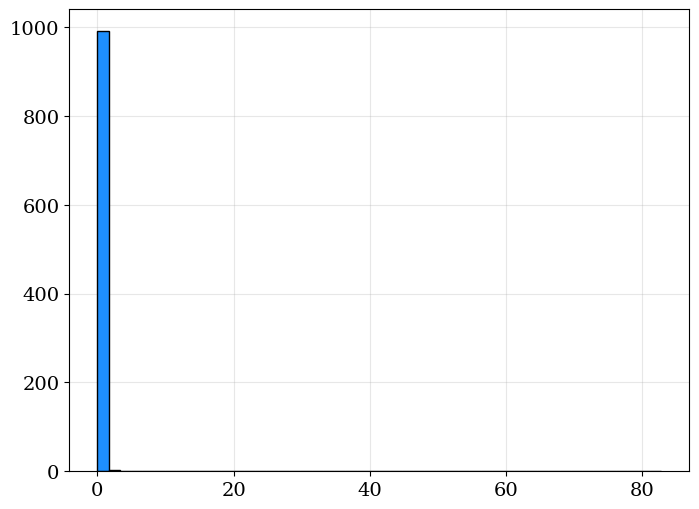

In [91]:
plt.hist(W[-1], bins=50, color="dodgerblue", edgecolor="k")
plt.show()

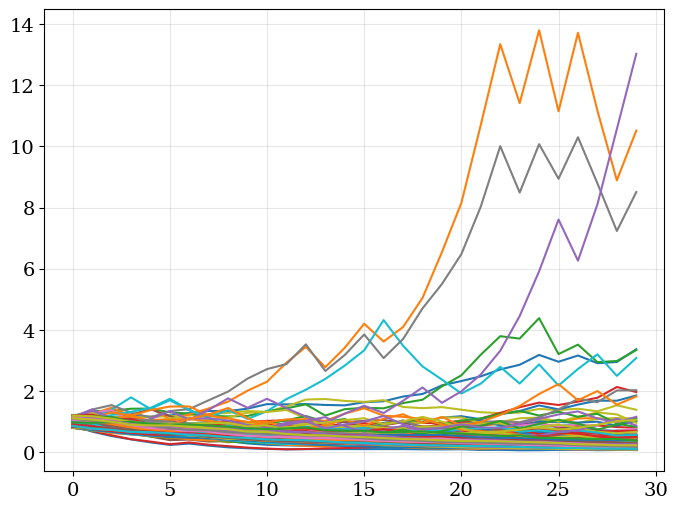

In [94]:
for i in range(W.shape[1]):
    plt.plot(W[:30,i])
    
plt.show()

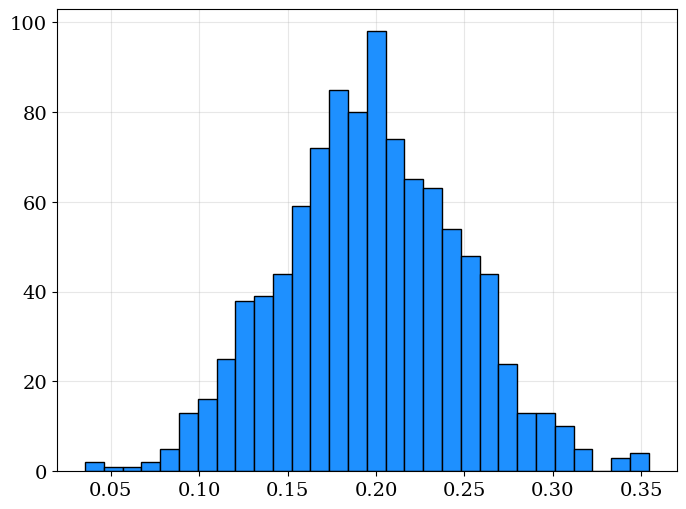

In [75]:
plt.hist(C[7], color="dodgerblue", edgecolor="k", bins=30)
plt.show()

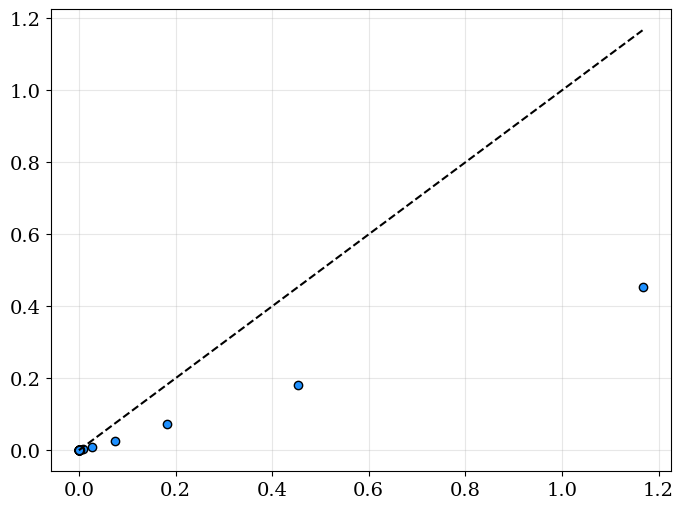

In [13]:
i = 10

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()